# Task 2.2+ Supervised preprocessing and visualization
### Modul 12: Application of Machine Learning in Health Care
**Author:** Markus Schwaiger

**Date:** April 8, 2024

---

- Load dataset diabetes.csv
- Define and apply a function for IQR based outlier detection 
- Replace outliers with NA and select only complete cases 
- Rank features using Chi2
- Create boxplot and distribution plots of one discriminating (i.e., highest IG score) and one non-discriminating feature (i.e., smallest IG score)
- Update your git-repository. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset diabetes.csv and get an overview

In [2]:
diab = pd.read_csv("diabetes.csv")
print("Dimension of dataset: ", diab.shape)
print("Number of missing values: ", diab.isnull().sum().sum())
diab.head()


Dimension of dataset:  (768, 9)
Number of missing values:  0


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## IQR based outlier detection

In [3]:
def outlier_detection(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier = (data < lower_bound) | (data > upper_bound)
    return outlier

## Replace outliers with NA and select only complete cases

In [4]:
diab_num = diab.select_dtypes(include=[np.number])
outliers = diab_num.apply(outlier_detection)
diab[outliers] = np.nan
diab_complete_cases = diab.dropna()
print("Dimension of dataset:", diab_complete_cases.shape)

Dimension of dataset: (639, 9)


## Supervised feature selection (Chi2)

In [5]:
X = diab_complete_cases.iloc[:, :-1]  # Features (select all rows and last column not)
y = diab_complete_cases.iloc[:, -1]   # class labels (all rows and only last column)

chi2_scores, p_values = chi2(X,y)
feature = X.columns
diab_chi2 = pd.DataFrame({"Feature": feature, "Chi2_Score": chi2_scores})
diab_chi2 = diab_chi2.sort_values(by="Chi2_Score", ascending=False)
# Print the ranked features based on chi2 scores
print(diab_chi2)


  Feature   Chi2_Score
1    plas  1105.956964
4    insu   585.352449
7     age   166.053612
0    preg    92.694844
5    mass    59.876004
2    pres    38.279636
3    skin     6.870105
6    pedi     3.002210


## Feature with highest and smallest IG score

In [6]:
chi2_score_high = diab_chi2.iloc[0]["Feature"]
chi2_score_small = diab_chi2.iloc[-1]["Feature"]
print("Highest Chi2 Score: ", chi2_score_high)
print("Smallest Chi2 Score: ", chi2_score_small)

Highest Chi2 Score:  plas
Smallest Chi2 Score:  pedi


## Boxplot and distribution for the Feature with the highest and smallest IG score

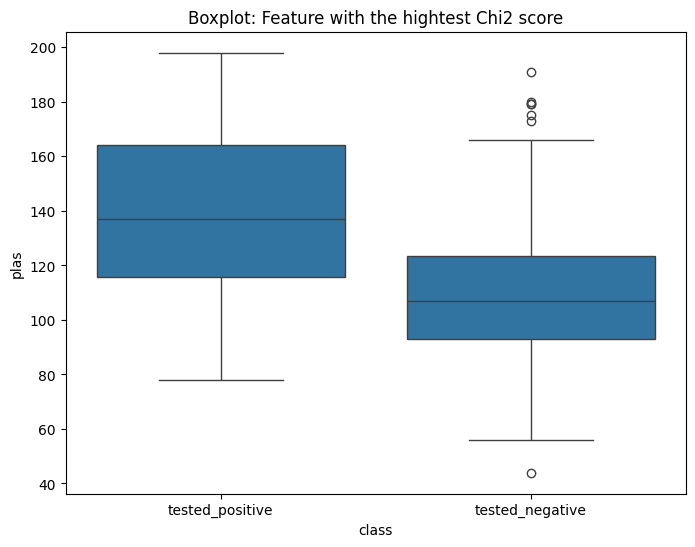

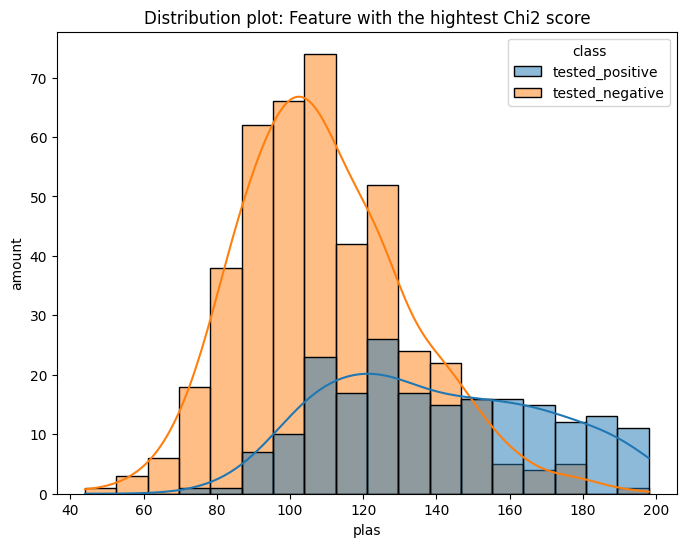

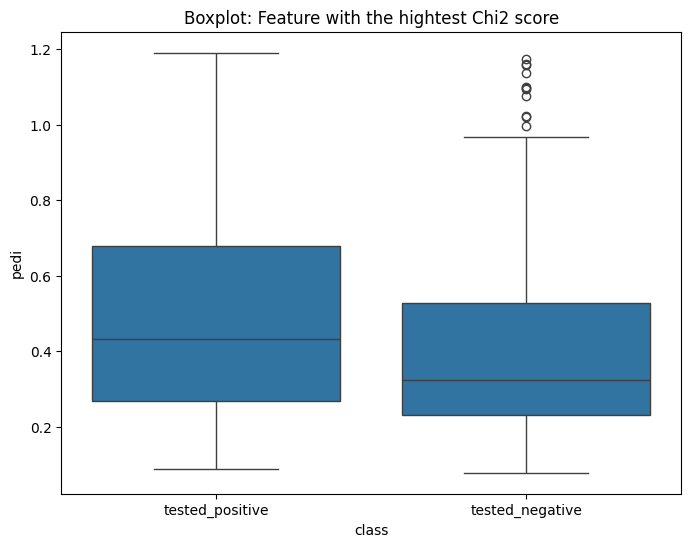

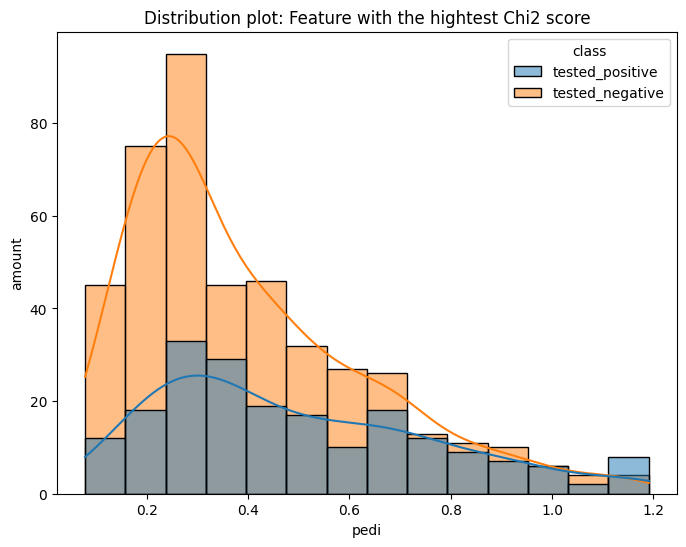

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y=chi2_score_high, data = diab_complete_cases)
plt.title("Boxplot: Feature with the hightest Chi2 score")
plt.xlabel("class")
plt.ylabel(chi2_score_high)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(x=chi2_score_high, data=diab_complete_cases, hue="class", kde=True)
plt.title("Distribution plot: Feature with the hightest Chi2 score")
plt.xlabel(chi2_score_high)
plt.ylabel("amount")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y=chi2_score_small, data = diab_complete_cases)
plt.title("Boxplot: Feature with the hightest Chi2 score")
plt.xlabel("class")
plt.ylabel(chi2_score_small)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(x=chi2_score_small, data=diab_complete_cases, hue="class", kde=True)
plt.title("Distribution plot: Feature with the hightest Chi2 score")
plt.xlabel(chi2_score_small)
plt.ylabel("amount")
plt.show()

